# Where should a drinks company run promotions?

## 📖 Background
The company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has provided historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

# EDA & feature engineering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/DataCamp/russian_alcohol_consumption.csv', index_col=0)
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 100.9+ KB


In [4]:
missing = df[((df.isna() == True).any(axis = 1) == True)]
missing

,year,region,wine,beer,vodka,champagne,brandy
17,1998,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
31,1998,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
63,1998,Sevastopol,NaN,NaN,NaN,NaN,NaN
79,1998,Chechen Republic,NaN,NaN,NaN,NaN,NaN
102,1999,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1439,2014,Chechen Republic,NaN,4.9,NaN,NaN,NaN
1462,2015,Republic of Ingushetia,NaN,0.5,NaN,NaN,NaN
1524,2015,Chechen Republic,NaN,2.2,NaN,NaN,NaN
1547,2016,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN


In [5]:
missing.groupby('region').wine.count()

region
Chechen Republic          0
Republic of Crimea        0
Republic of Ingushetia    3
Sevastopol                0
Name: wine, dtype: int64

In [6]:
df = df.drop(missing.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1549 non-null   int64  
 1   region     1549 non-null   object 
 2   wine       1549 non-null   float64
 3   beer       1549 non-null   float64
 4   vodka      1549 non-null   float64
 5   champagne  1549 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.8+ KB


We'll calculate relative popularity of different drinks by regions:

In [7]:
drinks = ['wine',	'beer',	'vodka',	'champagne',	'brandy']

df['total'] = np.sum(df.iloc[:, 2:7], axis = 1)

for drink in drinks:
  df[drink + ' %'] = round(df[drink] / df['total'] * 100, 2)

df.head()

,year,region,wine,beer,vodka,champagne,brandy,total,wine %,beer %,vodka %,champagne %,brandy %
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5,13.10,60.69,23.45,2.07,0.69
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0,9.43,54.86,32.29,3.14,0.29
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7,5.04,50.84,41.49,1.68,0.96
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3,15.75,38.83,42.86,1.47,1.10
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4,9.24,57.32,30.25,2.55,0.64


How has overall alcohol consumption changed over time?

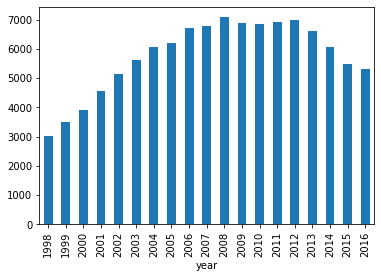

In [8]:
df.groupby('year').total.sum().plot(kind = 'bar');

Which regions are the leaders in alcohol consumption?

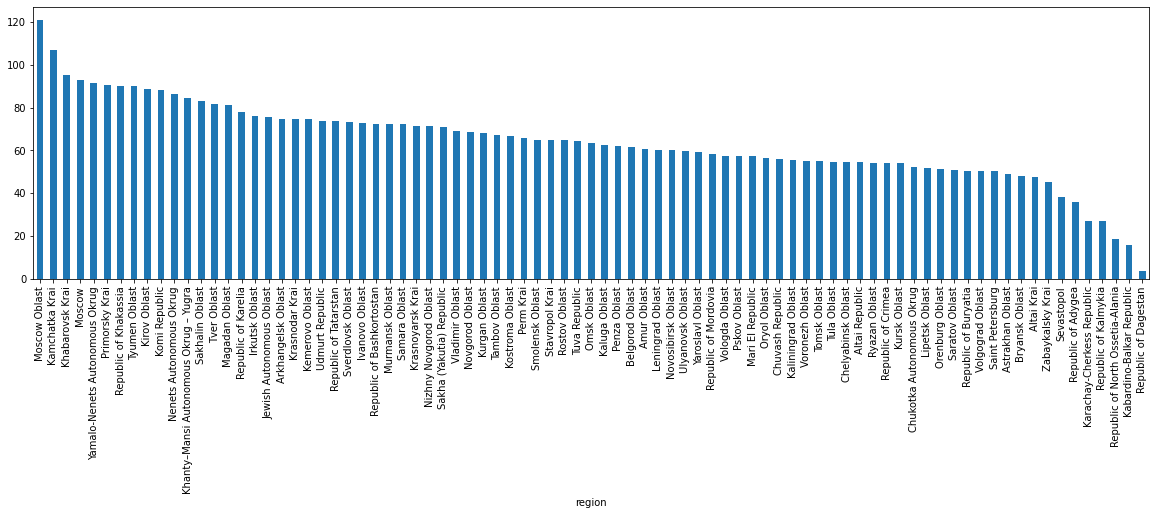

In [9]:
df[df.year == 2016].groupby('region').total.sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (20, 5));

As we can see, alcohol consumption in St. Petersburg is relatively low.

Let's see how the popularity of different drinks has changed over time in St. Petersburg:

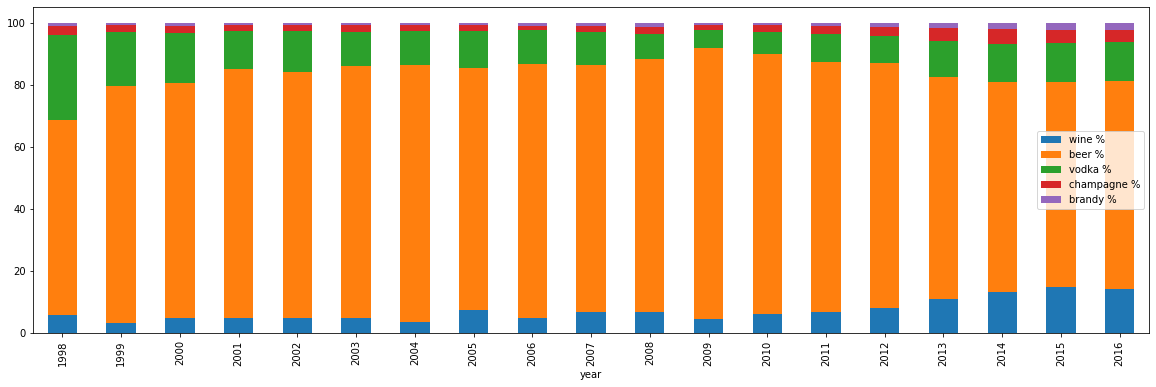

In [10]:
spb = df[df.region == 'Saint Petersburg'].set_index('year').iloc[:, 7:]
spb.plot(kind = 'bar', stacked = True, figsize = (20, 6));

We are primarily interested in wine consumption. As we can see, the popularity of wine in St. Petersburg has grown in recent years.

Let's group the data on wine consumption by region and year and calculate the moving average for 3 years:

In [11]:
data = df.groupby(['region', 'year'])[['wine', 'wine %']].first().reset_index()

In [12]:
rm_wine = data.groupby('region').wine.rolling(3).mean().reset_index()['wine']
rm_wine_share = data.groupby('region')['wine %'].rolling(3).mean().reset_index()['wine %']

In [13]:
data['rm_wine'] = round(rm_wine, 1)
data['rm_wine_perc'] = round(rm_wine_share, 2)
data

,region,year,wine,wine %,rm_wine,rm_wine_perc
0,Altai Krai,1998,3.3,9.43,NaN,NaN
1,Altai Krai,1999,2.2,5.56,NaN,NaN
2,Altai Krai,2000,2.1,4.51,2.5,6.50
3,Altai Krai,2001,2.3,4.16,2.2,4.74
4,Altai Krai,2002,1.6,2.81,2.0,3.83
...,...,...,...,...,...,...
1544,Zabaykalsky Krai,2012,6.6,7.36,6.5,7.37
1545,Zabaykalsky Krai,2013,6.4,7.52,6.5,7.41
1546,Zabaykalsky Krai,2014,6.6,11.79,6.5,8.89
1547,Zabaykalsky Krai,2015,6.6,14.13,6.5,11.15


We will use the moving average of wine consumption in absolute and relative numbers for the last 3 years.

In [14]:
data = data[data.year.isin([2014, 2015, 2016])].drop(['wine', 'wine %'], axis = 1)
data

,region,year,rm_wine,rm_wine_perc
16,Altai Krai,2014,4.4,5.82
17,Altai Krai,2015,4.3,6.62
18,Altai Krai,2016,4.4,8.14
35,Altai Republic,2014,4.5,6.67
36,Altai Republic,2015,4.2,7.16
...,...,...,...,...
1528,Yaroslavl Oblast,2015,8.9,11.71
1529,Yaroslavl Oblast,2016,9.8,14.91
1546,Zabaykalsky Krai,2014,6.5,8.89
1547,Zabaykalsky Krai,2015,6.5,11.15


In [15]:
data = pd.concat([pd.crosstab(data.region, data.year, data.rm_wine, aggfunc = 'first').reset_index(), pd.crosstab(data.region, data.year, data.rm_wine_perc, aggfunc = 'first').reset_index().drop('region', axis = 1)], axis = 1)
data.columns = ['region', 'rm_2014',	'rm_2015',	'rm_2016',	'rm_2014_perc',	'rm_2015_perc',	'rm_2016_perc']
data

,region,rm_2014,rm_2015,rm_2016,rm_2014_perc,rm_2015_perc,rm_2016_perc
0,Altai Krai,4.4,4.3,4.4,5.82,6.62,8.14
1,Altai Republic,4.5,4.2,4.3,6.67,7.16,8.02
2,Amur Oblast,6.2,6.3,6.1,6.86,7.93,8.97
3,Arkhangelsk Oblast,9.7,9.6,9.4,11.97,12.08,11.79
4,Astrakhan Oblast,4.7,4.7,4.8,5.41,7.01,8.57
...,...,...,...,...,...,...,...
78,Vologda Oblast,9.3,8.9,9.0,8.64,11.45,14.05
79,Voronezh Oblast,6.8,6.1,5.6,7.24,7.71,8.77
80,Yamalo-Nenets Autonomous Okrug,5.7,5.1,4.7,4.88,4.74,4.78
81,Yaroslavl Oblast,9.1,8.9,9.8,9.76,11.71,14.91


In [16]:
data = data.drop(data[((data.isna() == True).any(axis = 1) == True)].index)

# Clustring

We'll use hierarchical clustering to find the regions most similar to St. Petersburg in terms of wine consumption in recent years:

In [17]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.patches as patches

In [18]:
scaled = pd.DataFrame(StandardScaler().fit_transform(data.iloc[:, 1:]), index=data.index, columns=data.columns[1:])
new_data = pd.concat([data.region, scaled], axis = 1)
new_data

,region,rm_2014,rm_2015,rm_2016,rm_2014_perc,rm_2015_perc,rm_2016_perc
0,Altai Krai,-0.835358,-0.795624,-0.733064,-0.812054,-0.644831,-0.297748
1,Altai Republic,-0.790189,-0.839978,-0.775446,-0.499638,-0.458290,-0.335260
2,Amur Oblast,-0.022306,0.091445,-0.012558,-0.429804,-0.192298,-0.038285
3,Arkhangelsk Oblast,1.558629,1.555108,1.386071,1.448366,1.241299,0.843264
4,Astrakhan Oblast,-0.699849,-0.618210,-0.563533,-0.962749,-0.510107,-0.163327
...,...,...,...,...,...,...,...
78,Vologda Oblast,1.377951,1.244634,1.216540,0.224431,1.023668,1.549754
79,Voronezh Oblast,0.248711,0.002738,-0.224471,-0.290136,-0.268296,-0.100806
80,Yamalo-Nenets Autonomous Okrug,-0.248154,-0.440797,-0.605915,-1.157549,-1.294267,-1.348104
81,Yaroslavl Oblast,1.287611,1.244634,1.555602,0.636085,1.113484,1.818595


In [19]:
da = new_data.set_index('region').rename_axis(None)

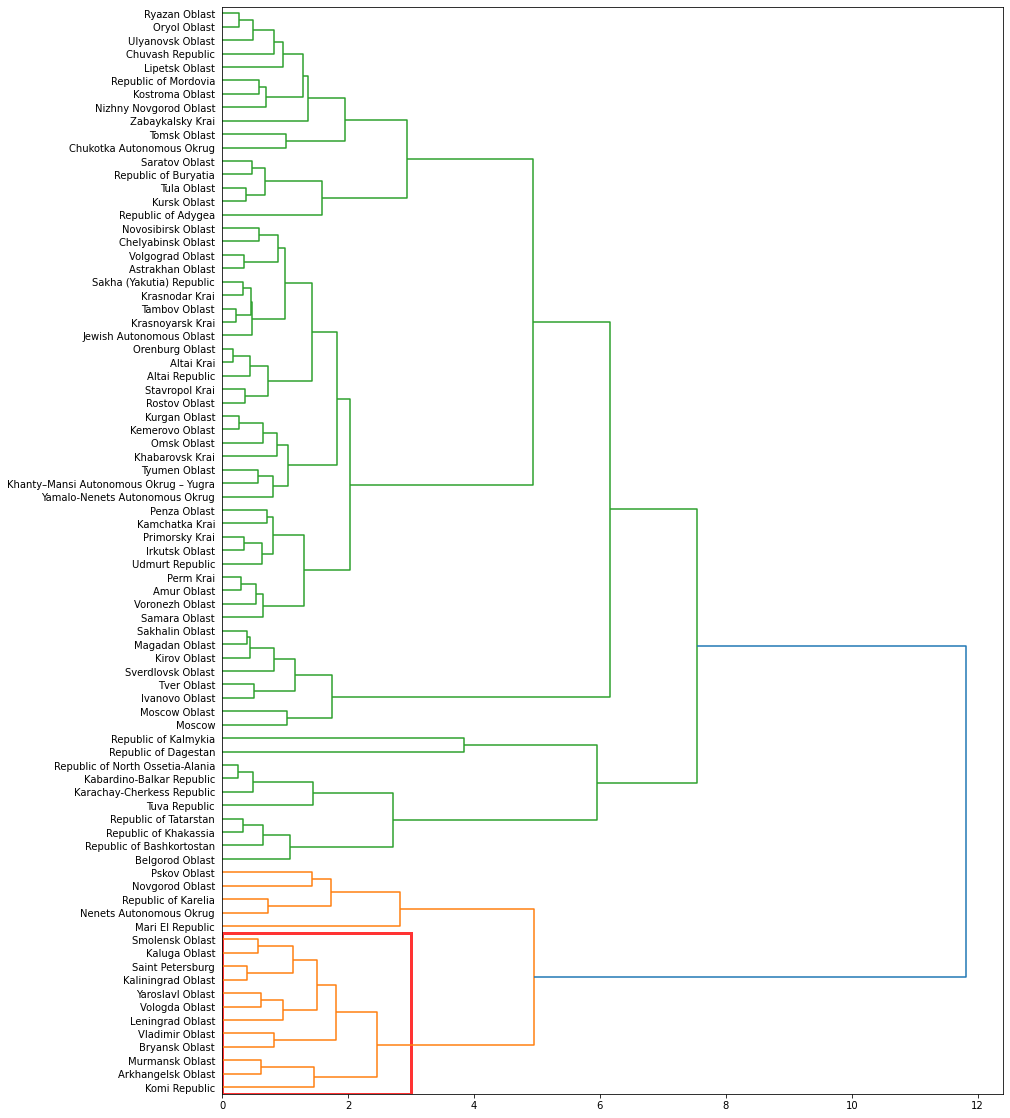

In [33]:
mergings = linkage(da, method = 'complete')

fig, ax = plt.subplots(figsize=(14, 20))
dendrogram(mergings, labels = da.index, orientation='right', leaf_rotation = 0, leaf_font_size = 10)

rect = patches.Rectangle((0, 0), 3, 120, linewidth=3, edgecolor='r', 
                         fill=False, facecolor=None, alpha=0.8)
ax.add_patch(rect)

plt.show()

In [21]:
da['cluster'] = fcluster(mergings, 3, criterion='distance')
spb_cluster = da.loc['Saint Petersburg', 'cluster']

In [22]:
regs = da[da.cluster == spb_cluster]
regs

,rm_2014,rm_2015,rm_2016,rm_2014_perc,rm_2015_perc,rm_2016_perc,cluster
Arkhangelsk Oblast,1.558629,1.555108,1.386071,1.448366,1.241299,0.843264,1
Bryansk Oblast,0.835916,0.889807,0.750331,1.661544,1.780193,1.637284,1
Kaliningrad Oblast,0.564898,0.623686,0.792713,0.834561,1.327660,1.746696,1
Kaluga Oblast,1.016594,0.845453,0.623182,1.183731,1.123848,0.883903,1
Komi Republic,1.558629,1.555108,1.555602,0.382477,0.512410,0.555667,1
Leningrad Oblast,0.655238,1.022867,1.174157,0.294265,0.961488,1.359064,1
Murmansk Oblast,1.648968,1.333341,0.877479,1.499822,1.106575,0.615062,1
Saint Petersburg,0.655238,0.712393,0.707948,1.022010,1.566017,1.556006,1
Smolensk Oblast,0.835916,0.889807,0.877479,0.819859,0.823310,0.818256,1
Vladimir Oblast,0.926255,1.155927,1.301305,1.470419,1.414021,1.290291,1


Let's also try the KMeans algorithm and compare the results:

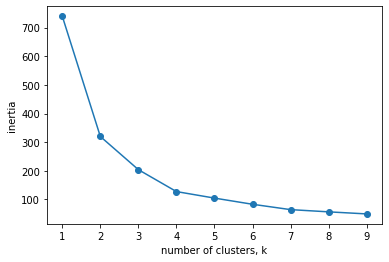

In [23]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    
    model.fit(da)
    
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [24]:
model = KMeans(n_clusters = 6)

model.fit(da)

labels = model.predict(da)

In [25]:
da['label'] = labels
da

,rm_2014,rm_2015,rm_2016,rm_2014_perc,rm_2015_perc,rm_2016_perc,cluster,label
Altai Krai,-0.835358,-0.795624,-0.733064,-0.812054,-0.644831,-0.297748,5,0
Altai Republic,-0.790189,-0.839978,-0.775446,-0.499638,-0.458290,-0.335260,5,0
Amur Oblast,-0.022306,0.091445,-0.012558,-0.429804,-0.192298,-0.038285,5,0
Arkhangelsk Oblast,1.558629,1.555108,1.386071,1.448366,1.241299,0.843264,1,1
Astrakhan Oblast,-0.699849,-0.618210,-0.563533,-0.962749,-0.510107,-0.163327,5,0
...,...,...,...,...,...,...,...,...
Vologda Oblast,1.377951,1.244634,1.216540,0.224431,1.023668,1.549754,1,1
Voronezh Oblast,0.248711,0.002738,-0.224471,-0.290136,-0.268296,-0.100806,5,0
Yamalo-Nenets Autonomous Okrug,-0.248154,-0.440797,-0.605915,-1.157549,-1.294267,-1.348104,5,0
Yaroslavl Oblast,1.287611,1.244634,1.555602,0.636085,1.113484,1.818595,1,1


In [26]:
spb_label = da.loc['Saint Petersburg', 'label']
regions = da[da.label == spb_label]
regions

,rm_2014,rm_2015,rm_2016,rm_2014_perc,rm_2015_perc,rm_2016_perc,cluster,label
Arkhangelsk Oblast,1.558629,1.555108,1.386071,1.448366,1.241299,0.843264,1,1
Bryansk Oblast,0.835916,0.889807,0.750331,1.661544,1.780193,1.637284,1,1
Kaliningrad Oblast,0.564898,0.623686,0.792713,0.834561,1.327660,1.746696,1,1
Kaluga Oblast,1.016594,0.845453,0.623182,1.183731,1.123848,0.883903,1,1
Komi Republic,1.558629,1.555108,1.555602,0.382477,0.512410,0.555667,1,1
Leningrad Oblast,0.655238,1.022867,1.174157,0.294265,0.961488,1.359064,1,1
Murmansk Oblast,1.648968,1.333341,0.877479,1.499822,1.106575,0.615062,1,1
Saint Petersburg,0.655238,0.712393,0.707948,1.022010,1.566017,1.556006,1,1
Smolensk Oblast,0.835916,0.889807,0.877479,0.819859,0.823310,0.818256,1,1
Vladimir Oblast,0.926255,1.155927,1.301305,1.470419,1.414021,1.290291,1,1


As we can see, we have got the same list of regions. Let's visualize the resulting segments:

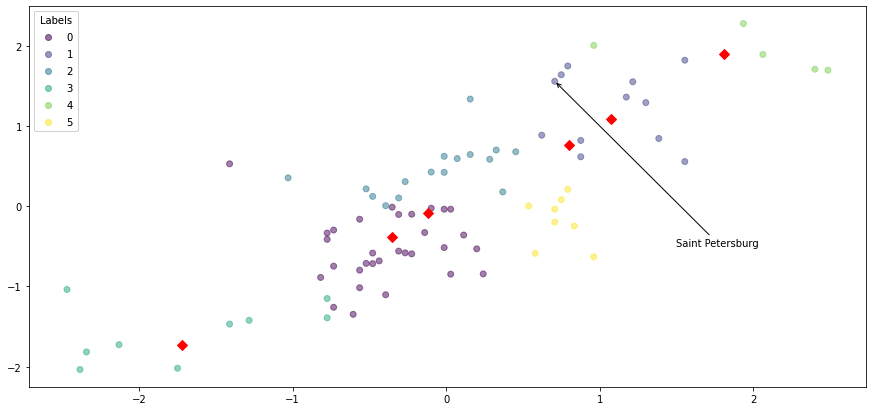

In [34]:
fig, ax = plt.subplots(figsize=(15, 7))

xs = da.iloc[:,2]
ys = da.iloc[:,5]

scatter = ax.scatter(xs, ys, c = labels, alpha = 0.5)

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

centroids = ax.scatter(centroids_x, centroids_y, marker = 'D', c = 'red', s = 50)

legend = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Labels")
ax.add_artist(legend)
ax.annotate('Saint Petersburg', xy=(0.708, 1.556), xytext=(1.5, -0.5), arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
plt.show()

We only need to select 10 regions. Let's exclude the region with the lowest share of wine consumption:

In [28]:
data[data.region.isin(regions.index)].sort_values('rm_2016_perc', ascending = False)

,region,rm_2014,rm_2015,rm_2016,rm_2014_perc,rm_2015_perc,rm_2016_perc
81,Yaroslavl Oblast,9.1,8.9,9.8,9.76,11.71,14.91
14,Kaliningrad Oblast,7.5,7.5,8.0,10.30,12.33,14.68
6,Bryansk Oblast,8.1,8.1,7.9,12.55,13.64,14.33
59,Saint Petersburg,7.7,7.7,7.8,10.81,13.02,14.07
78,Vologda Oblast,9.3,8.9,9.0,8.64,11.45,14.05
28,Leningrad Oblast,7.7,8.4,8.9,8.83,11.27,13.44
76,Vladimir Oblast,8.3,8.7,9.2,12.03,12.58,13.22
15,Kaluga Oblast,8.5,8.0,7.6,11.25,11.74,11.92
3,Arkhangelsk Oblast,9.7,9.6,9.4,11.97,12.08,11.79
65,Smolensk Oblast,8.1,8.1,8.2,10.26,10.87,11.71


In [29]:
final = list(regions.drop(['Komi Republic', 'Saint Petersburg']).index)
final

['Arkhangelsk Oblast',
 'Bryansk Oblast',
 'Kaliningrad Oblast',
 'Kaluga Oblast',
 'Leningrad Oblast',
 'Murmansk Oblast',
 'Smolensk Oblast',
 'Vladimir Oblast',
 'Vologda Oblast',
 'Yaroslavl Oblast']

# Result

Here are 10 regions where we would expect the wine promotion to be similarly successful as it was in Saint Petersburg:

In [35]:
for i in final:
  print(i)

Arkhangelsk Oblast
Bryansk Oblast
Kaliningrad Oblast
Kaluga Oblast
Leningrad Oblast
Murmansk Oblast
Smolensk Oblast
Vladimir Oblast
Vologda Oblast
Yaroslavl Oblast
